In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [44]:
data = pd.read_csv("Rice_Cammeo_Osmancik.csv")
data

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

Class Distribution:
Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64
Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

Class Percentage Distribution:
Class
Osmancik    57.217848
Cammeo      42.782152
Name: count, dtype: float64

The dataset is imbalanced.


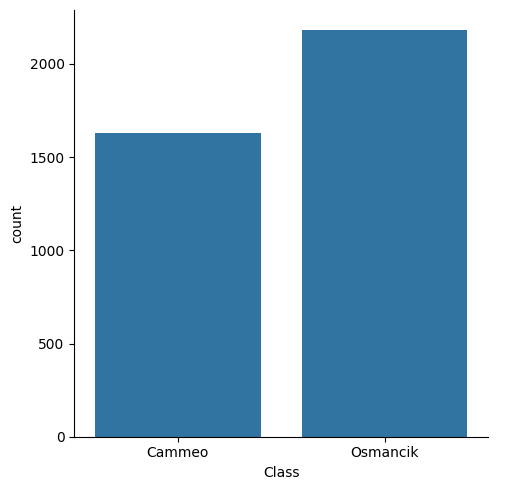

In [123]:
class_distribution = data['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

print(data['Class'].value_counts())
sns.catplot(data=data, x='Class', kind='count');

# class percentage
total_samples = len(data)
class_percentage = (class_distribution / total_samples) * 100
print("\nClass Percentage Distribution:")
print(class_percentage)

# Determine if dataset is balanced
threshold = 5
if class_percentage.max() - class_percentage.min() > threshold:
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3809 non-null   float64
 1   Perimeter          3808 non-null   float64
 2   Major_Axis_Length  3809 non-null   float64
 3   Minor_Axis_Length  3808 non-null   float64
 4   Eccentricity       3808 non-null   float64
 5   Convex_Area        3809 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [125]:
data.isnull()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3805,False,False,False,False,False,False,False,False
3806,False,False,False,False,False,False,False,False
3807,False,False,False,False,False,False,False,False
3808,False,False,False,False,False,False,False,False


In [126]:
# Drop columns with high missing values
data = data.dropna(thresh=len(data) * 0.5, axis=1).loc[:, data.nunique() > 1]

# Drop irrelevant columns
data = data.drop(columns=['ID'], errors='ignore')  # Replace 'ID' with actual column names if needed

print("Remaining Features:")
print(data.columns.tolist())

Remaining Features:
['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']


**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [127]:
missing_counts = data.isnull().sum()
print("Missing Observations in Each Attribute:")
print(missing_counts)

data_cleaned = data.dropna()

print("\nShape of the dataset before removing missing values:", data.shape)
print("Shape of the dataset after removing missing values:", data_cleaned.shape)

Missing Observations in Each Attribute:
Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Convex_Area          1
Extent               0
Class                0
dtype: int64

Shape of the dataset before removing missing values: (3810, 8)
Shape of the dataset after removing missing values: (3801, 8)


**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [128]:
# numeric attribute columns
numeric_data = data.select_dtypes(include=['number'])
numeric_columns = numeric_data.columns.tolist()

print("Numeric Attribute Columns:")
print(numeric_columns)


Numeric Attribute Columns:
['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']


**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [129]:
five_number_summary = numeric_data.describe()
print(five_number_summary)

              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3809.00000  3808.000000        3809.000000        3808.000000   
mean   12667.60147   454.260467         188.771983          86.311224   
std     1732.57767    35.593654          17.449007           5.730241   
min     7551.00000   359.100006         145.264465          59.532406   
25%    11370.00000   426.177002         174.352432          82.730242   
50%    12421.00000   448.860504         185.801941          86.430691   
75%    13950.00000   483.692993         203.523453          90.133766   
max    18913.00000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3808.000000   3809.000000  3810.000000  
mean       0.886865  12952.933578     0.661934  
std        0.020821   1777.000836     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872383  11627.000000     0.598862  
50%        0.889010  12707.000000     0.645361  

**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

In [130]:
correlation_table = numeric_data.corr()
print("Correlation Table:")
print(correlation_table)


Correlation Table:
                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966467           0.903014           0.787929   
Perimeter          0.966467   1.000000           0.971869           0.629962   
Major_Axis_Length  0.903014   0.971869           1.000000           0.452034   
Minor_Axis_Length  0.787929   0.629962           0.452034           1.000000   
Eccentricity       0.351906   0.544152           0.710861          -0.291914   
Convex_Area        0.998940   0.969918           0.903338           0.787372   
Extent            -0.061151  -0.131334          -0.139510           0.062958   

                   Eccentricity  Convex_Area    Extent  
Area                   0.351906     0.998940 -0.061151  
Perimeter              0.544152     0.969918 -0.131334  
Major_Axis_Length      0.710861     0.903338 -0.139510  
Minor_Axis_Length     -0.291914     0.787372  0.062958  
Eccentricity           1.000000     0.352393 -0.198493 

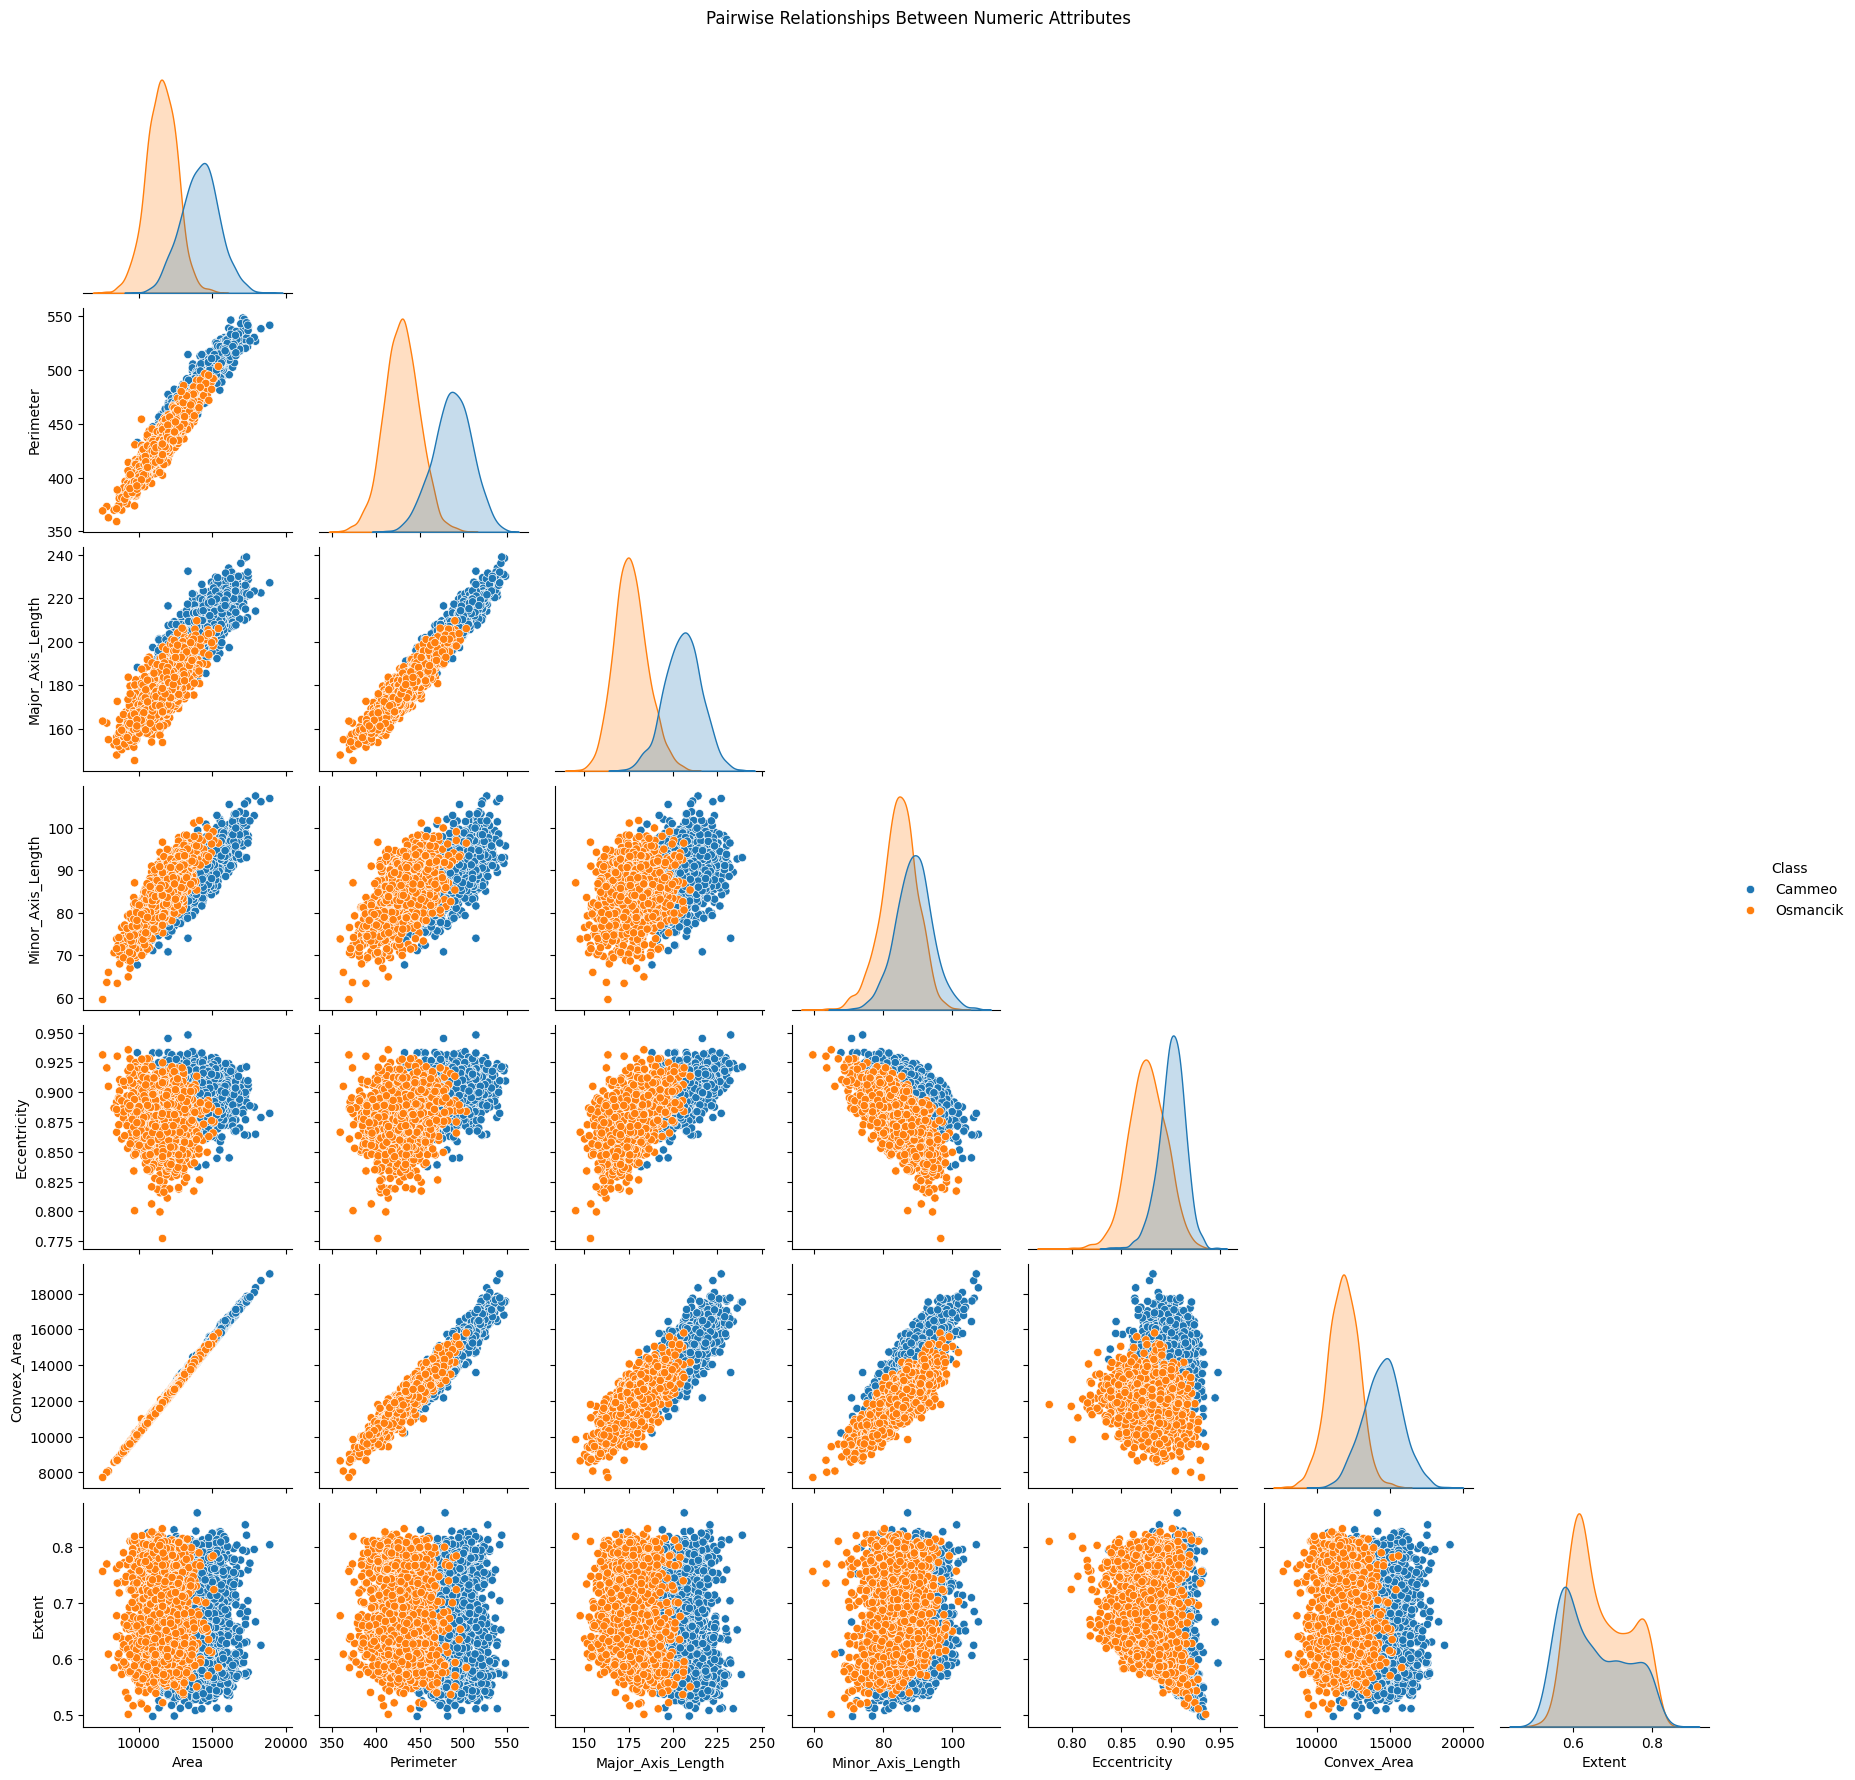

In [131]:
sns.pairplot(data, hue='Class', diag_kind='kde', corner=True)

# Display the plots
plt.suptitle("Pairwise Relationships Between Numeric Attributes", y=1.02)
plt.show()


**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

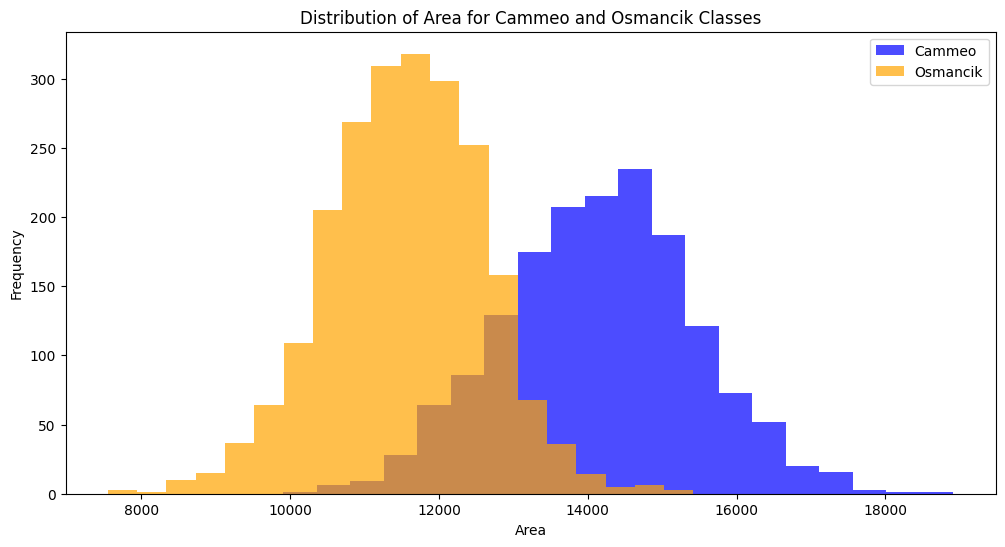

In [132]:
# Filter the data for each class
cammeo_data = data[data['Class'] == 'Cammeo']['Area']
osmancik_data = data[data['Class'] == 'Osmancik']['Area']

# Plot histograms for each class
plt.figure(figsize=(12, 6))

# Cammeo class
plt.hist(cammeo_data, bins=20, alpha=0.7, label='Cammeo', color='blue')

# Osmancik class
plt.hist(osmancik_data, bins=20, alpha=0.7, label='Osmancik', color='orange')

# Add labels, title, and legend
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area for Cammeo and Osmancik Classes')
plt.legend()
plt.show()


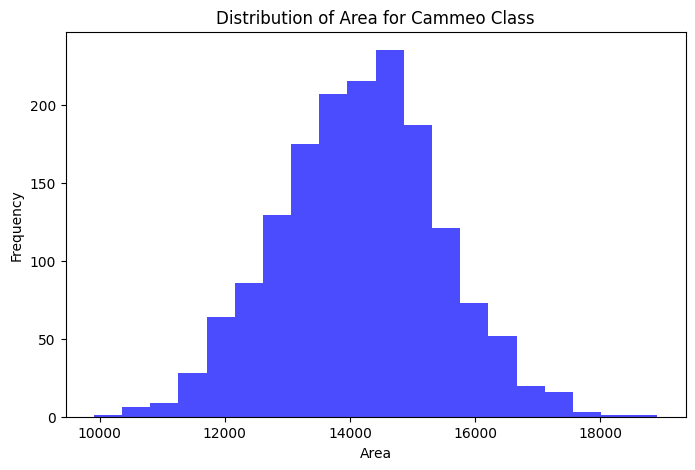

In [133]:
# Plot histogram for Cammeo
plt.figure(figsize=(8, 5))
plt.hist(cammeo_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Area for Cammeo Class')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


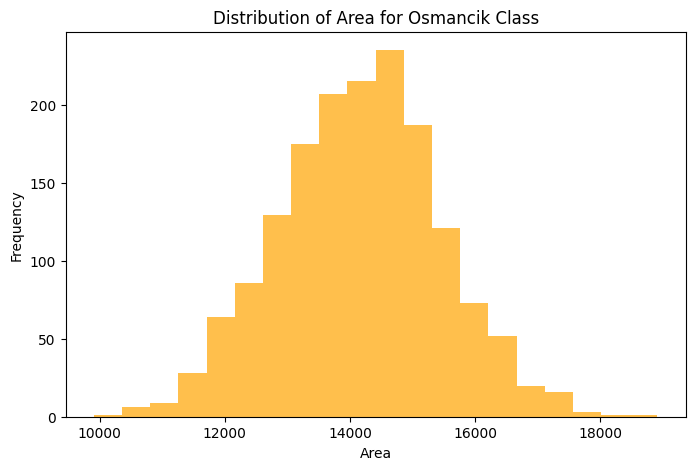

In [134]:
plt.figure(figsize=(8, 5))
plt.hist(cammeo_data, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Area for Osmancik Class')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

- The peak of the Cammeo histogram occurs at a smaller Area value compared to Osmancik, indicating Cammeo grains are generally smaller on average.

- The range of Cammeo Area values is smaller, while Osmancik shows a broader range, including larger grain areas.

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

In [183]:
# Identify outliers
outliers = {}
for column in numeric_data.columns:
    Q1 = numeric_data[column].quantile(0.25)
    Q3 = numeric_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    has_outliers = ((numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)).any()
    outliers[column] = "Has Outliers" if has_outliers else "No Outliers"

outliers_data = pd.DataFrame(list(outliers.items()), columns=["Attribute", "Outlier Status"])
print(outliers_data)


           Attribute Outlier Status
0               Area   Has Outliers
1          Perimeter    No Outliers
2  Major_Axis_Length    No Outliers
3  Minor_Axis_Length   Has Outliers
4       Eccentricity   Has Outliers
5        Convex_Area   Has Outliers
6             Extent    No Outliers


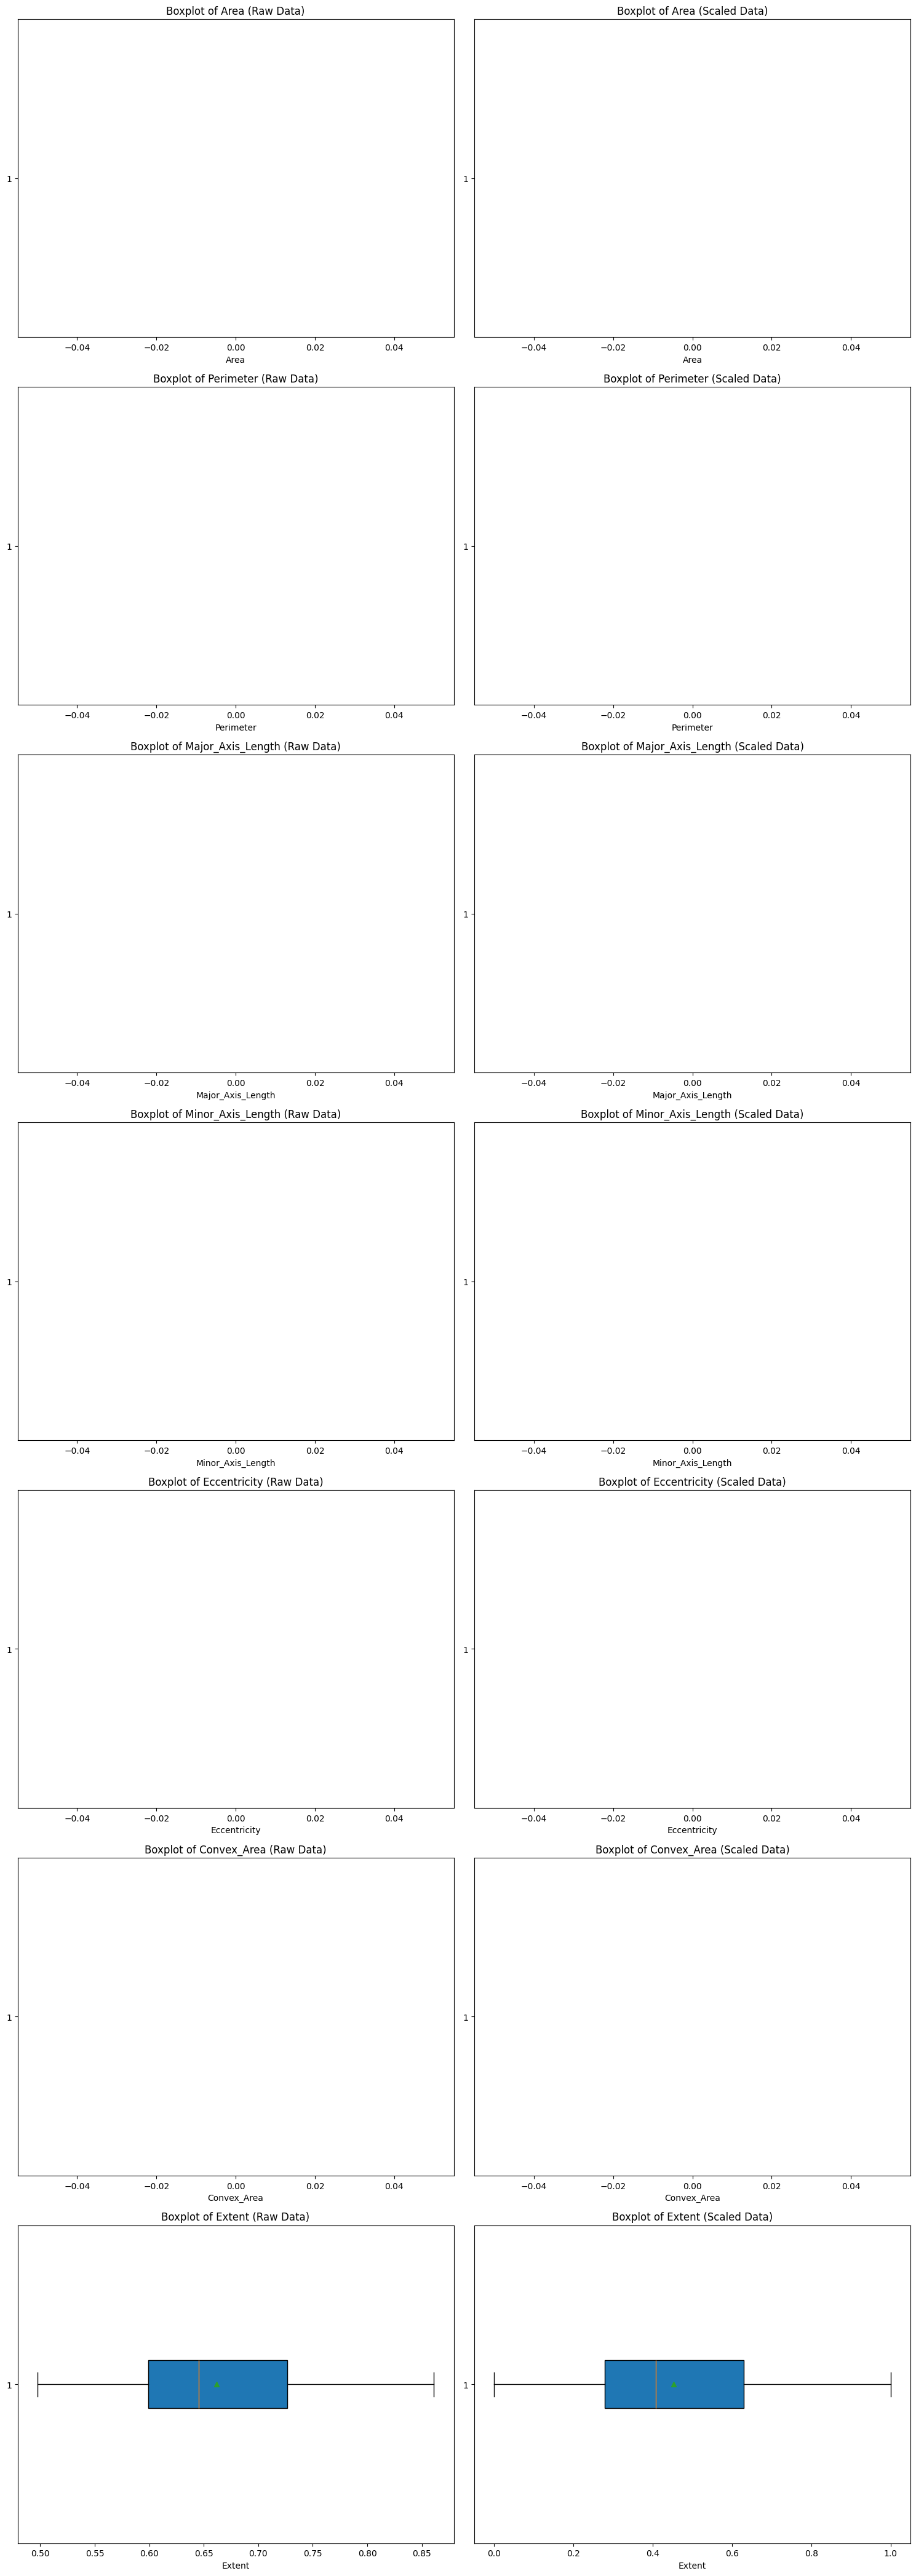

In [184]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Scale the data using Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# raw data vs scaled data
plt.figure(figsize=(15, len(numeric_columns.columns) * 6))

for i, column in enumerate(numeric_columns.columns, 1):
    # Raw data boxplot
    plt.subplot(len(numeric_columns.columns), 2, 2 * i - 1)
    plt.boxplot(numeric_columns[column], vert=False, patch_artist=True, showmeans=True)
    plt.title(f"Boxplot of {column} (Raw Data)")
    plt.xlabel(column)
    
    # Scaled data boxplot
    plt.subplot(len(numeric_columns.columns), 2, 2 * i)
    plt.boxplot(scaled_data[column], vert=False, patch_artist=True, showmeans=True)
    plt.title(f"Boxplot of {column} (Scaled Data)")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [185]:
from sklearn.preprocessing import LabelEncoder

#categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Handle missing values in categorical columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()

for column in categorical_columns:
    if column == 'Class':  # Assuming 'Class' is nominal
        data = pd.get_dummies(data, columns=[column], drop_first=True)
    else:  # Label encode other categorical attributes if present
        data[column] = label_encoder.fit_transform(data[column])



Categorical Columns: Index([], dtype='object')


In [186]:
# processed dataset
print("Preprocessed Dataset:")
print(data.head())

Preprocessed Dataset:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class_Osmancik  
0      15617.0  0.572896           False  
1      15072.0  0.615436           False  
2      14954.0  0.693259           False  
3      13368.0  0.640669           False  
4      15262.0  0.646024           False  


## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [187]:
print(data.columns)


Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class_Osmancik'],
      dtype='object')


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


X = data.drop(columns=['Class_Osmancik'])  
y = data['Class_Osmancik']  

X.fillna(X.mean(), inplace=True)

# scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# KNN classifier with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))





Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.83      0.85       489
        True       0.88      0.92      0.90       654

    accuracy                           0.88      1143
   macro avg       0.88      0.87      0.87      1143
weighted avg       0.88      0.88      0.88      1143



Conclusion:

The KNN model with one neighbor was evaluated after handling missing values, achieving reasonable classification performance.

The metrics such as precision, recall, and F1-score highlight that while KNN can effectively classify the data, its performance depends heavily on proper scaling and the choice of 
𝑘. Further tuning may enhance its results.



## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear']  # Solvers to test
}

grid_search = GridSearchCV(
    estimator=logistic_model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1
)

# Fit Grid Search on Training Data
grid_search.fit(X_train, y_train)

# Get the Best Parameters and Model
best_lr_model = grid_search.best_estimator_
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)

# Classification Report of LR Model
y_pred_lr = best_lr_model.predict(X_test)
print("\nClassification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))


Best Hyperparameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}

Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

       False       0.93      0.89      0.90       489
        True       0.92      0.95      0.93       654

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



Comparision:
Logistic Regression with hyperparameter optimization via Grid Search demonstrated superior or comparable performance, with better generalization and robustness against noisy or imbalanced data. This makes it a more reliable choice for this dataset.